In [1]:
%load_ext autoreload
%autoreload 2

import sympy as sp
from qbee import *
from visualization import visualize

sp.init_printing()

x, y, z = sp.symbols('x, y, z')
dot_x, dot_y, dot_z = derivatives('x, y, z')


### Simple systems

In [2]:
system = EquationSystem([
    sp.Eq(dot_x, x**3)
])

system.equations

In [3]:
quadratic_linearize(system).equations

In [4]:
system = EquationSystem([
    sp.Eq(dot_x, x**3),
    sp.Eq(dot_y, x * z**2),
    sp.Eq(dot_z, z)
])

system.equations

In [5]:
quadratic_linearize(system).equations

# Example 6.3.5 from [article](https://www2.eecs.berkeley.edu/Pubs/TechRpts/2012/EECS-2012-217.pdf)

There are several methods to quadratic-linearize a system.

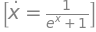

In [6]:
system = EquationSystem([
    sp.Eq(dot_x, 1 / (1 + sp.exp(x)))
])

system.equations

In [7]:
poly_system = polynomialize(system)
poly_system.equations


In [8]:
ql_system = quadratic_linearize(poly_system, mode='optimal', method_optimal='bfs', log_file='log.csv')
ql_system.equations

In [9]:
ql_system.statistics

steps: 3
Method's name: BFS
depth: 1

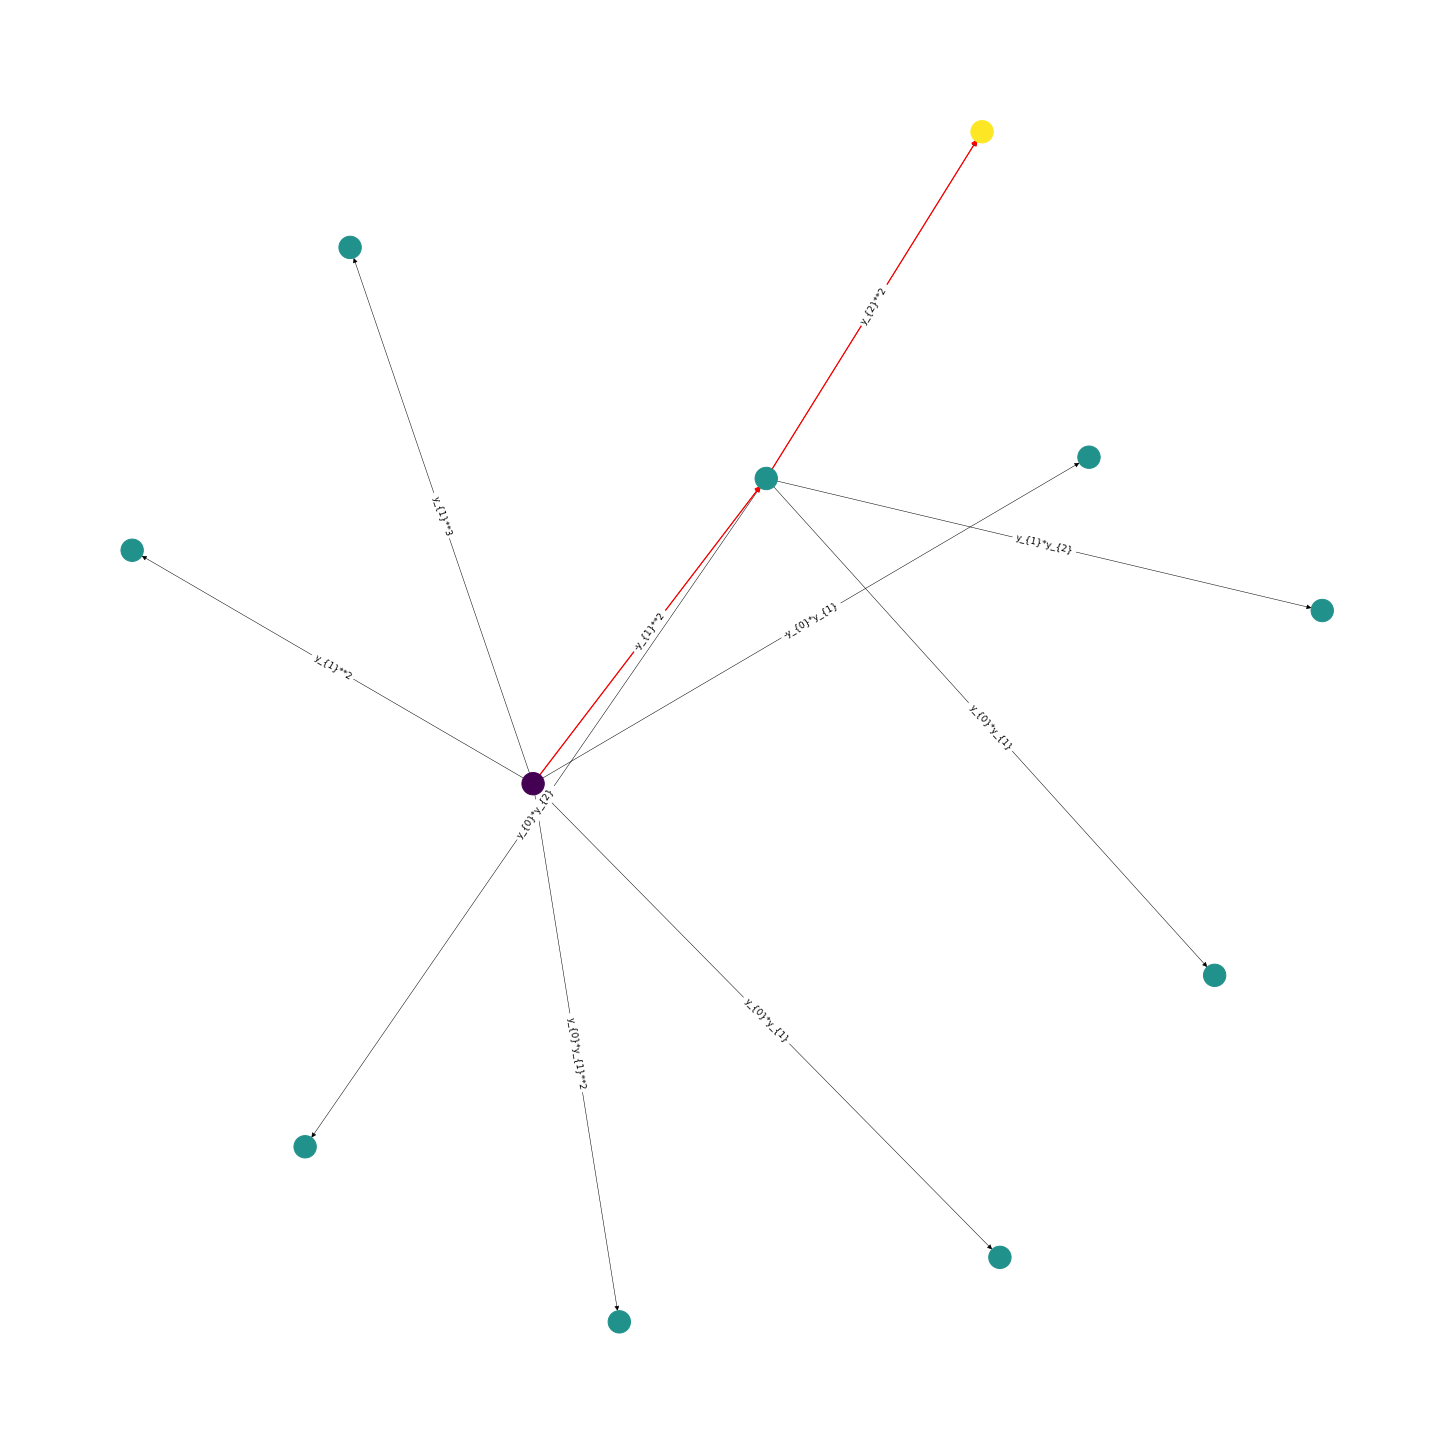

In [10]:
visualize('log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)


In [11]:
ql_system = quadratic_linearize(poly_system, mode='optimal', method_optimal='iddfs',  log_file='log.csv')
ql_system.equations

In [12]:
ql_system.statistics

steps: 2
Method's name: IDDFS
depth: 1

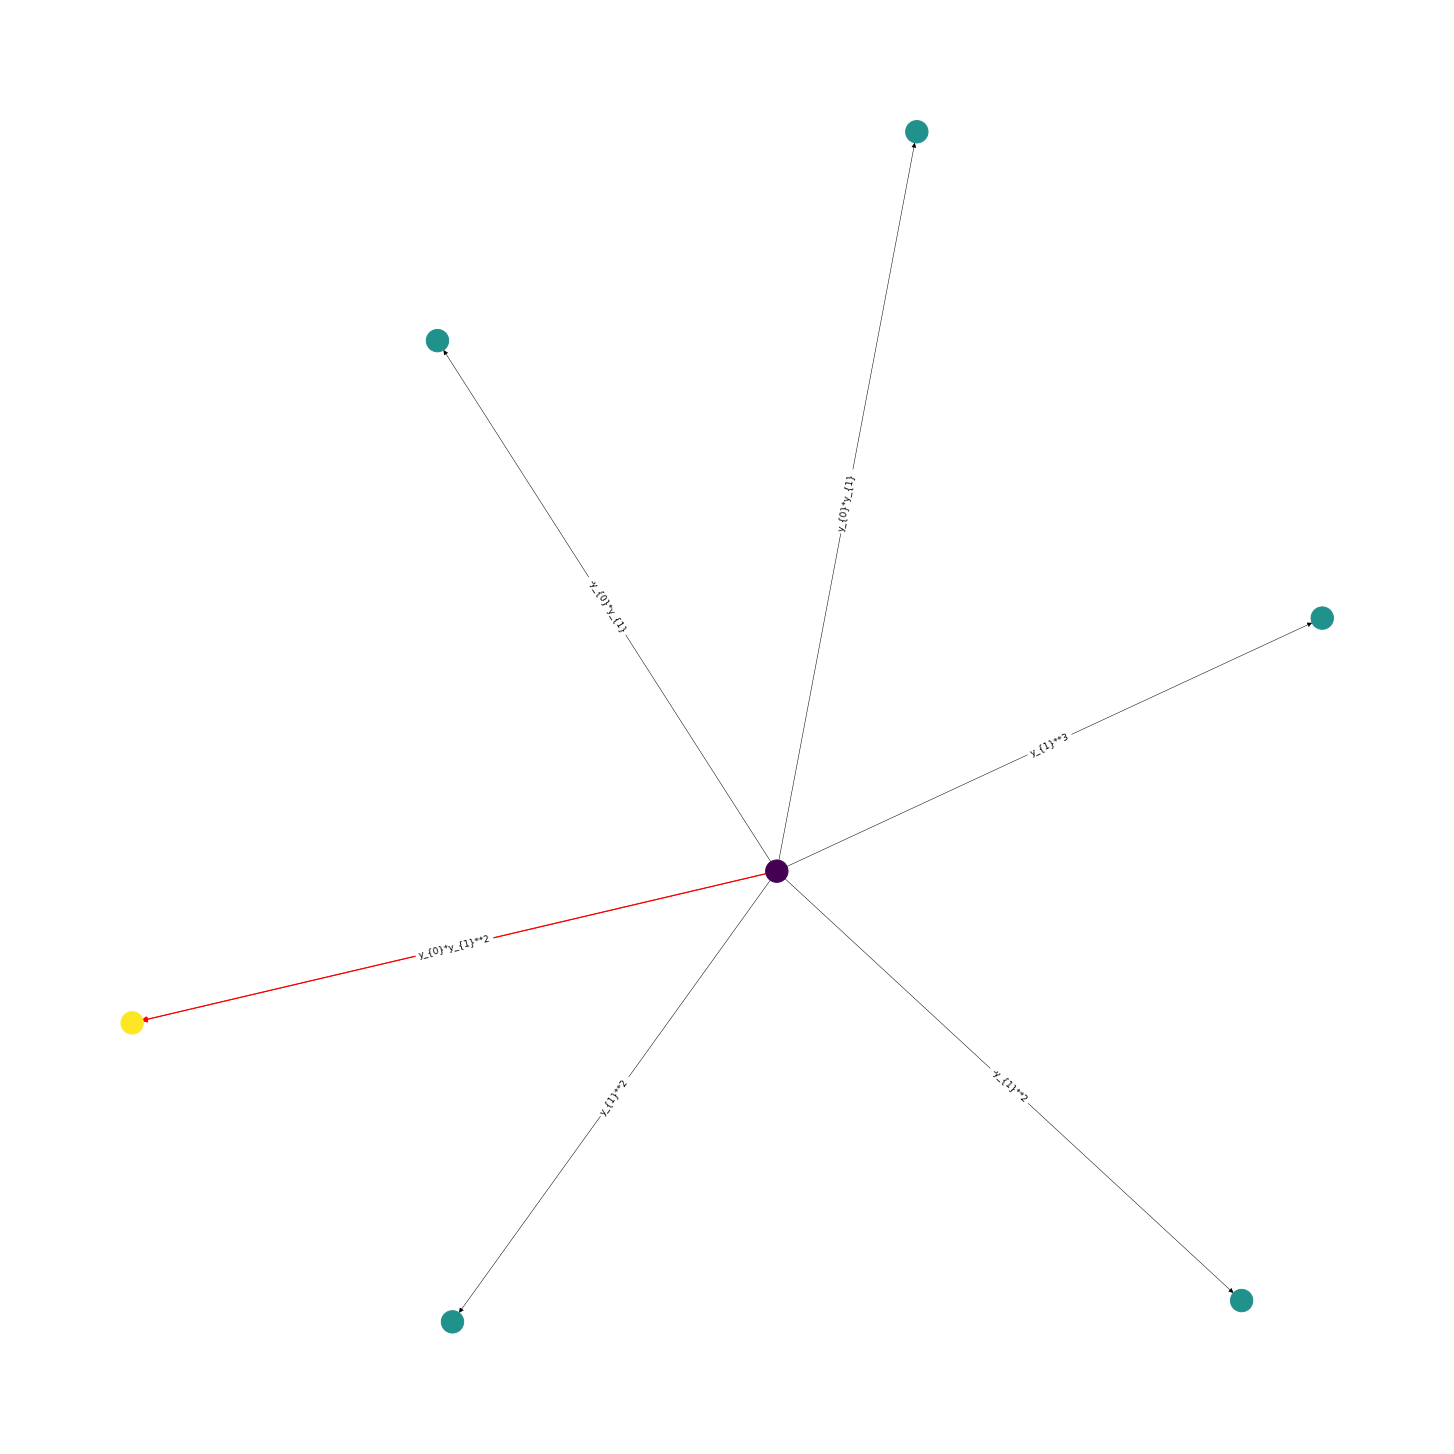

In [13]:
visualize('log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)


# $x^2y^2z^2$ Example

In [14]:
w = sp.symbols('w')
dot_w = derivatives('w')

system = EquationSystem([
    sp.Eq(dot_x, 0),
    sp.Eq(dot_y, 0),
    sp.Eq(dot_z, 0),
    sp.Eq(dot_w, x**2 * y**2 * z**2)
])

poly_system = polynomialize(system)

poly_system.equations

In [15]:
ql_system = quadratic_linearize(poly_system, mode='optimal', method_optimal='bfs', log_file='log.csv')
ql_system.equations

In [16]:
ql_system.statistics

steps: 5
Method's name: BFS
depth: 1

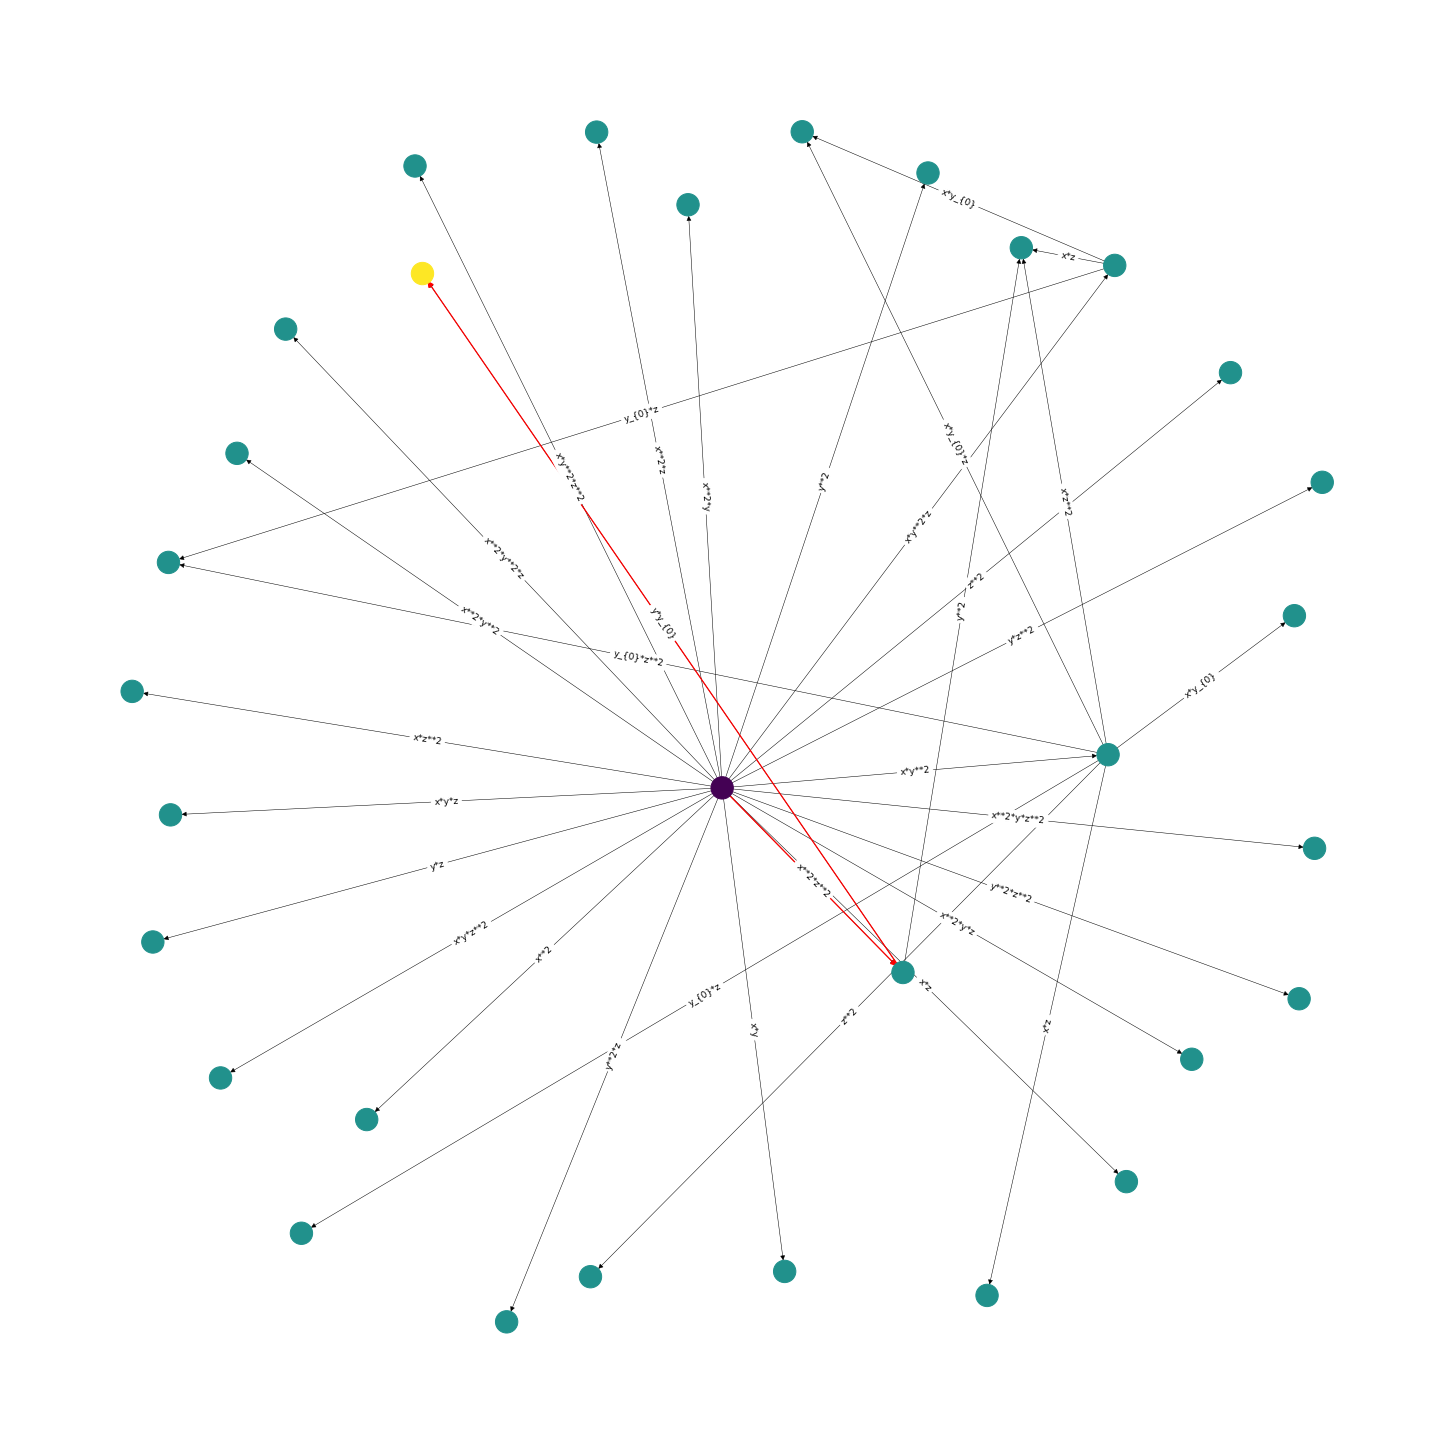

In [17]:
visualize('log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)


In [18]:
ql_system = quadratic_linearize(poly_system, mode='optimal', method_optimal='iddfs', log_file='log.csv')
ql_system.equations

In [19]:
ql_system.statistics

steps: 2
Method's name: IDDFS
depth: 1

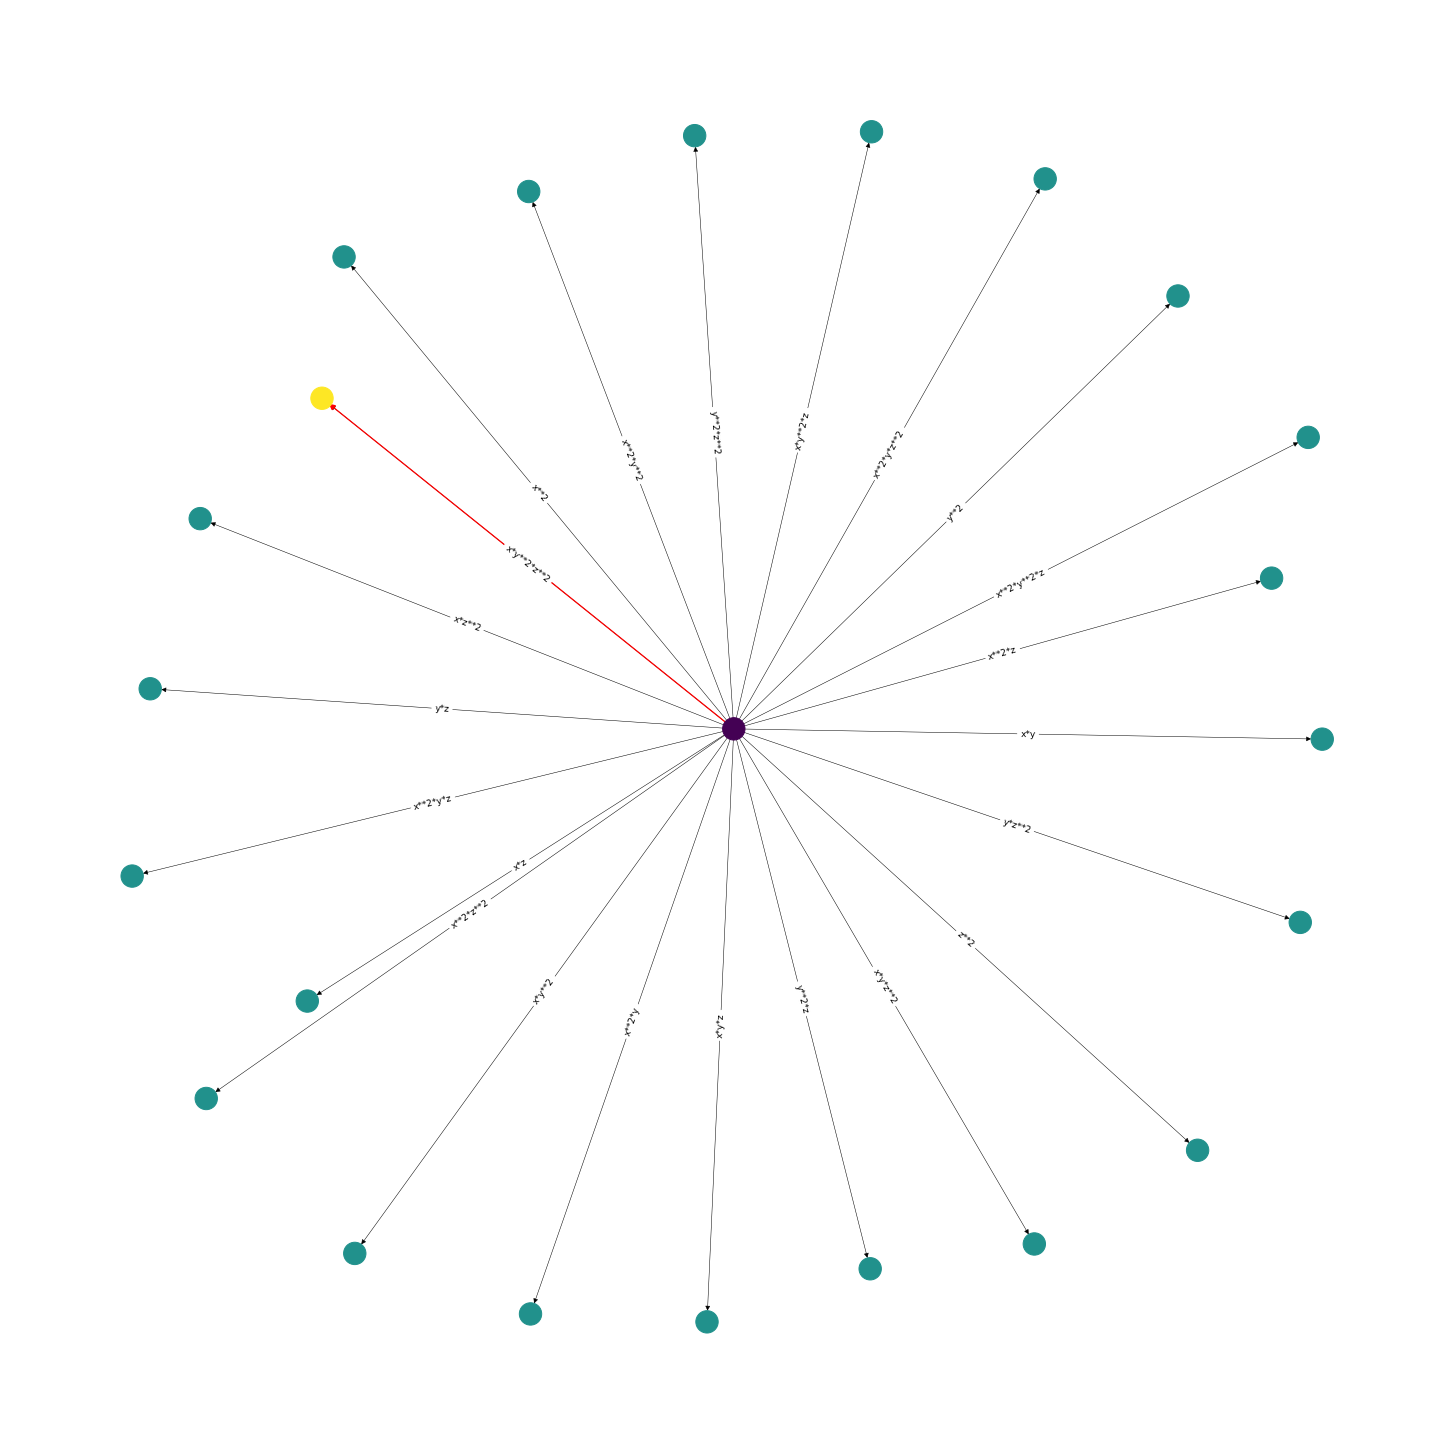

In [20]:
visualize('log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)

# Tough Example

In [21]:
system = EquationSystem([
    sp.Eq(dot_x, x / (1 + sp.exp(x))),
])

system.equations

In [22]:
poly_system = polynomialize(system)
poly_system.equations

## BFS

In [23]:
ql_system = quadratic_linearize(poly_system, method_optimal='bfs', debug='info', log_file='log.csv')
ql_system.equations

System nodes queued: 100%|██████████████████████████████▉| 6950/6951 [09:49<00:00, 11.80node/s, Current depth level: 2]


In [24]:
ql_system.statistics

steps: 291
Method's name: BFS
depth: 2

## Tuned ID-DFS

In [25]:
ql_system = quadratic_linearize(poly_system, method_optimal='iddfs', heuristics='summary-monomial-degree',
                                initial_max_depth=2, debug='info', log_file='log.csv')
ql_system.equations

System nodes queued:  99%|██████████████████████████████▌| 78/79 [00:05<00:00, 14.80node/s, Current max depth level: 2]


In [26]:
ql_system.statistics


steps: 10
Method's name: IDDFS
depth: 2